# Data Exploration 

在這個Notebook中，主要針對feature做解析，在這階段並不使用其他演算法，僅單純利用觀察到的現象做推測。

[1. Import Modules & dataset](#section1)

[2. Uni-Variable](#section2)

[3. bi-Variable](#section3)

主要觀察到的現象包含，生存者以女性、小孩為主。


<a id='section1'></a>
## 1. Import Modules & dataset

In [2]:
# import mudules
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [3]:
# import data
train_df = pd.read_csv('data/train.csv')
test_df = pd.read_csv('data/test.csv')
full_df = pd.concat([train_df, test_df])

In [4]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Ryerson, Miss. Emily Borie",male,347082,C23 C25 C27,S
freq,1,577,7,4,644


In [7]:
test_df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [61]:
test_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,418,418,418,91,418
unique,418,2,363,76,3
top,"Minkoff, Mr. Lazar",male,PC 17608,B57 B59 B63 B66,S
freq,1,266,5,3,270


In [136]:
def showBarText(ax):
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width()/2.,
                height + 3,
               '{:1.2f}'.format(height),
                ha="center")

<a id='section2'></a>
## 1. Uni-varaible exploration
這次預測中，目標是預測是否『生還』，所以一開始針對『Survived』這個feature先觀察。




###  1.1 Survived 生還 (First Prediction)
**死：活 = 0.61 : 0.38**

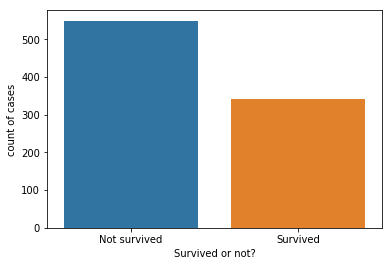

,Not survived,Survived
Survival Rate,0.616162,0.383838
Count,549.000000,342.000000


In [60]:
# survived or not?
survived = train_df['Survived'].map({0:'Not survived',1:'Survived'})

sns.countplot(survived)
plt.xlabel('Survived or not?')
plt.ylabel('count of cases')
plt.show()

survivalRate = survived.value_counts() / survived.count()
SurvivalPanel = pd.DataFrame(survivalRate).rename(columns={'Survived':'Survival Rate'})
SurvivalPanel = pd.concat([SurvivalPanel,survived.value_counts()],axis=1).rename(columns={'Survived':'Count'})

SurvivalPanel.transpose()

In [158]:
# Prediction 1 : all dead ? Kaggle Score: 0.62679
test_df['Survived'] = 0
Prediction = pd.concat([test_df['Survived'],test_df['PassengerId']], axis=1)
Prediction.to_csv('Prediction_allDead.csv', index = False)

### 1.2 Age 年齡 -> 分類小孩、成年、老人

按照10歲一個區間，看dataset中的年齡分佈，
先將na的值填入0，

看出**大部分人的年齡分佈多在20~40歲。**

並依照 10歲以下、10~70歲、70歲以上分類

In [173]:
# Age (child, adult, elder) (嘗試continious or discrete)
# No.1 continious

age = train_df['Age'] 
age.fillna(0, inplace=True)


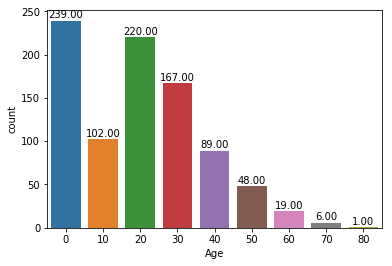

In [174]:
# Age bar 分佈圖
ageData = age.apply(lambda age : int(age//10*10))

ax_Age = sns.countplot(ageData)
showBarText(ax_Age)

In [175]:
# Age 分類(child, adult, elder)
ageCatData = age.apply(lambda age: 'adult' if (age//10) > 1 and (age//10) < 7 else('child' if (age//10) < 2 else 'elder'))


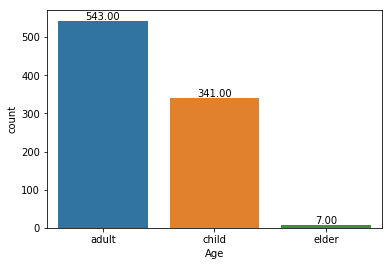

In [176]:
# Age 分類圖
ax_Age_cat = sns.countplot(ageCatData)
showBarText(ax_Age_cat)

## 1.3 姓名 -> 取得身份別

利用姓名的前面稱謂，可分類出不同人的身份，像是船員、貴族、男女

In [125]:
# Name to identity

Title_Dictionary = {
                    "Capt":       "Officer",
                    "Col":        "Officer",
                    "Major":      "Officer",
                    "Jonkheer":   "Royalty",
                    "Don":        "Royalty",
                    "Sir" :       "Royalty",
                    "Dr":         "Officer",
                    "Rev":        "Officer",
                    "the Countess":"Royalty",
                    "Dona":       "Royalty",
                    "Mme":        "Mrs",
                    "Mlle":       "Miss",
                    "Ms":         "Mrs",
                    "Mr" :        "Mr",
                    "Mrs" :       "Mrs",
                    "Miss" :      "Miss",
                    "Master" :    "Master",
                    "Lady" :      "Royalty"
                    }

Name = train_df['Name']
Title = Name.map(lambda name: name.split(',')[1].split('.')[0].strip())
Title = Title.map(Title_Dictionary)

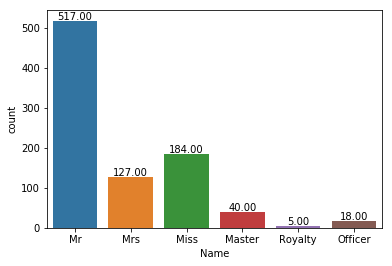

In [132]:
ax = sns.countplot(Title)
showBarText(ax)

## 1.4 家庭數 -> 單人 / 小家庭 / 大家庭


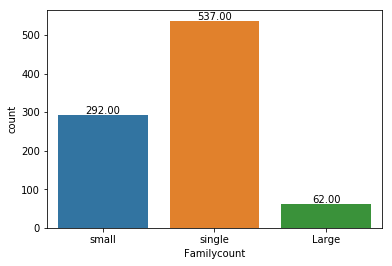

In [153]:
# Family size

train_df['Familycount'] = train_df['SibSp'] + train_df['Parch']
FamilySize = train_df['Familycount'].apply(lambda size: 'Large' if size >=4 else ('single' if size==0  else 'small'))
ax_family_size = sns.countplot(x=FamilySize)  
showBarText(ax_family_size)

## 1.5 票價


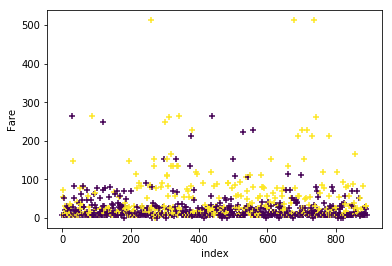

In [144]:
# Fare
Fare = train_df['Fare']
plt.scatter(Fare.index, Fare, c=train_df['Survived'], marker='+')
plt.xlabel('index')
plt.ylabel('Fare')

plt.show()


<a id='section3'></a>
## 2. bi-varaible exploration
先用correlation 跟heatmap觀察numerical data的相關性。

In [154]:
corr = train_df.corr().round(2)

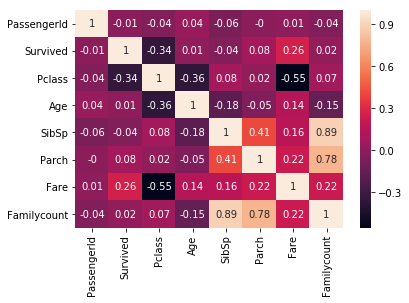

In [155]:
sns.heatmap(corr,annot=True)

### 2.1 Sex - Survival 
以生存率而言：
**女性：男性 = 0.68 : 0.31 **

可看出女性生存率較男性高出許多，所以在這階段第二次嘗試推測：

假設 ** 女性都存活 Kaggle score: 0.76555** 

In [120]:
# sex - survival
train_sex = train_df[['Sex','Survived']]

survived_data = train_df[train_df['Survived']== 1]
survivedRate = survived_data['Sex'].value_counts() / survived_data['Sex'].count()
survivedRate.name = 'survived'

notSurvived_data = train_df[train_df['Survived']== 0]
notSurvivedRate = notSurvived_data['Sex'].value_counts() / notSurvived_data['Sex'].count()
notSurvivedRate.name = 'not Survived'

pd.concat([survivedRate,notSurvivedRate],axis=1)


,survived,not Survived
female,0.681287,0.147541
male,0.318713,0.852459


In [169]:
test_df.loc[test_df['Sex']=='female','Survived'] = 1

In [170]:
# Prediction by using feature:sex  Kaggle score: 0.76555
test_df.loc[test_df['Sex']=='female','Survived']= 1
test_df.loc[test_df['Sex']=='male', 'Survived']= 0
Prediction = pd.concat([test_df['Survived'],test_df['PassengerId']], axis=1)

Prediction.to_csv('Prediction_femaleLive.csv', index = False)

## 2.2 Age - survival 

以年紀來看，70歲以上，死亡率較高，
其餘兩個因素並沒有明顯區別

假設 ** 女性都存活& 70歲以上死亡 Kaggle score: 0.76076** 

In [243]:
# age - survival
Agecate = pd.concat([ageCatData, train_df['Survived']],axis=1)
#Agecate.groupby(['Age','Survived']).size() / len(Agecate)
print('if the man is an adult:')
#print(Agecate.loc[Agecate['Age']=='adult','Survived'].value_counts() / len(Agecate.loc[Agecate['Age']=='adult']))
print(Agecate.loc[Agecate['Age']=='adult','Survived'].value_counts())
print('if the man is a child:')
#print(Agecate.loc[Agecate['Age']=='child','Survived'].value_counts() / len(Agecate.loc[Agecate['Age']=='child']))
print(Agecate.loc[Agecate['Age']=='child','Survived'].value_counts())
print('if the man is an elder:')
#print(Agecate.loc[Agecate['Age']=='elder','Survived'].value_counts() / len(Agecate.loc[Agecate['Age']=='elder']))
print(Agecate.loc[Agecate['Age']=='elder','Survived'].value_counts())

if the man is an adult:
0    333
1    210
Name: Survived, dtype: int64
if the man is a child:
0    210
1    131
Name: Survived, dtype: int64
if the man is an elder:
0    6
1    1
Name: Survived, dtype: int64


In [245]:
# Prediction by using feature:sex, Age  Kaggle score: 0.76555
test_df.loc[test_df['Sex']=='female','Survived']= 1
test_df.loc[test_df['Sex']=='male', 'Survived']= 0
test_df.loc[test_df['Age'] < 10, 'Survived']= 1
test_df.loc[test_df['Age'] > 70, 'Survived']= 0

Prediction = pd.concat([test_df['Survived'],test_df['PassengerId']], axis=1)

Prediction.to_csv('Prediction_femaleLivechildLiveElderDie.csv', index = False)

In [246]:
# Prediction by using feature:sex, Age  Kaggle score: :0.77033
test_df.loc[test_df['Sex']=='female','Survived']= 1
test_df.loc[test_df['Sex']=='male', 'Survived']= 0
test_df.loc[test_df['Age'] < 10, 'Survived']= 1
test_df.loc[test_df['Age'] > 70, 'Survived']= 0

Prediction = pd.concat([test_df['Survived'],test_df['PassengerId']], axis=1)

Prediction.to_csv('Prediction_femaleLivechildLiveElderDie.csv', index = False)

## 2.3 家庭人數 - survival
小家庭的人較有機會活下? 

假設女性都活，男性且為小家庭的人活 -> kaggle score = 0.67464

In [207]:
# Familysize - survival 
train_df.groupby(['Familysize','Survived']).size() / train_df['Familysize'].count()

Familysize  Survived
Large       0           0.058361
            1           0.011223
single      0           0.419753
            1           0.182941
small       0           0.138047
            1           0.189675
dtype: float64

In [222]:
# Prediction by using feature:sex, small family  Kaggle score: 0.67464
test_df['Familycount'] = test_df['SibSp'] + test_df['Parch']
test_df['Familysize']= test_df['Familycount'].apply(lambda size: 'Large' if size >=4 else ('single' if size==0  else 'small'))

test_df.loc[test_df['Sex']=='female','Survived']= 1
test_df.loc[test_df['Sex']=='male', 'Survived']= 0
test_df.loc[test_df['Familysize']=='small', 'Survived']= 1

Prediction = pd.concat([test_df['Survived'],test_df['PassengerId']], axis=1)

Prediction.to_csv('Prediction_femaleLive_SmallFamilyLive.csv', index = False)

### 2.4 Title 

In [219]:
# Title - survival 
train_df.groupby(['Title','Survived','Sex']).size() / train_df['Familysize'].count()

Title    Survived  Sex   
Master   0         male      0.014590
         1         female    0.006734
                   male      0.002245
Miss     0         female    0.006734
                   male      0.050505
         1         female    0.022447
                   male      0.007856
Mr       0         female    0.023569
                   male      0.132435
         1         female    0.083053
                   male      0.030303
Mrs      0         female    0.013468
                   male      0.039282
         1         female    0.022447
                   male      0.006734
Officer  0         female    0.001122
                   male      0.004489
Royalty  1         male      0.001122
dtype: float64

In [223]:
# Prediction by using feature:sex,title Kaggle score: 0.76555
Name = test_df['Name']
Title = Name.map(lambda name: name.split(',')[1].split('.')[0].strip())
test_df['Title'] = Title.map(Title_Dictionary)
test_df.loc[test_df['Sex']=='female','Survived']= 1
test_df.loc[test_df['Sex']=='male', 'Survived']= 0
test_df.loc[test_df['Title']=='Officer', 'Survived']= 0
test_df.loc[test_df['Title']=='Royalty', 'Survived']= 1

Prediction = pd.concat([test_df['Survived'],test_df['PassengerId']], axis=1)

Prediction.to_csv('Prediction_Sex_Title.csv', index = False)

### 2.5 Pclass
Pclass = 3的男性大部分都死了

In [230]:
# Pclass - survival
train_df.groupby(['Pclass','Survived','Sex']).size() / train_df['Familysize'].count()

Pclass  Survived  Sex   
1       0         female    0.003367
                  male      0.086420
        1         female    0.102132
                  male      0.050505
2       0         female    0.006734
                  male      0.102132
        1         female    0.078563
                  male      0.019080
3       0         female    0.080808
                  male      0.336700
        1         female    0.080808
                  male      0.052750
dtype: float64